# Summer 2022 Data Science Intern Challenge

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd


In [2]:
# loading csv data
df = pd.read_csv('/Users/sareenah/Desktop/shoe_shops1.csv')

I've loaded up the data set, confirmed data was clean and all 7 columns and 5000 rows are accounted for.  I previously confirmed in google sheets that there were no duplicates or white spaces to trim.
Let's look at the data

# The Data Frame

In [3]:
#Lets get a look at the dataframe
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


# Finding Central Measures of Tendency

In [4]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000



with the data frame describe method above, I was able to confirm the <b>count, mean, and standard deviation</b> agree with my preliminary calculations done in sheets. 

If you look at the mean value of <b>3145.128</b>, you can see it matches the <b>AOV</b> as calculated by the team using the golden standard AOV formula: Total_Sales/Total_Orders = Avg. Order Value

If you look at the standard deviation of <b>1443.52</b> and consider the <b>three sigma rule</b> that in a normal distribution, 68% of observed data will fall within the first standard deviation, 95 within the first 2, and 99.7 the first 3 we can be confident this is absolutely not a normal distribution.

What can be done about this? A couple things. One consideration would be to drop the extreme values from the data set and focus the analysis on the values that are most in line with the mean values.  In cases where the extremes could be due to inaccurate data capture, or an unusual anomaly this would be a good option.  

However, in Sheets I did a countif function to determine how many orders consisted of 2000 items and discovered 17 such recurring purchases.  This isn't an anomaly, its an opportunity! An opportunity to develop a customer profile for this lucrative reseller in order to deploy a focused a marketing strategy to cultivate and retain more customers such as this.  All while NOT forgetting about the two pair buyers that fuel the vast majority of the 5000 monthly sales.

With all this in mind, I chose to keep the outlier values, and investigate the MODE values of the data set to see if I can find a more realistic AOV to benchmark for further sales activities.

### Calculating MODE (frequency of each value)
Lets calculate the mode of total items and order amount to determine the most frequently appearing order profile.

In [5]:
df.mode()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53.0,718.0,153.0,2.0,credit_card,2017-03-28 4:00:00
1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4995,4996,NaN,NaN,NaN,NaN,NaN,NaN
4996,4997,NaN,NaN,NaN,NaN,NaN,NaN
4997,4998,NaN,NaN,NaN,NaN,NaN,NaN
4998,4999,NaN,NaN,NaN,NaN,NaN,NaN


### Now we can see the most frequently occurring order amount value is 153.00, and the most frequent number of items per order is 2.

This is incredibly important because we can confirm that the average order value of 3145.13 while mathematically correct (AOV = total_sales/total_orders) gives us a distorted picture of the average customer purchase due to the extreme outliers.  For this situation, a better metric would be to identify the MODE of total_sales and items_per_order, as this will identify the most frequent Order Value.  


### What we've learned
The shop that appears most on invoices would be the shop with ID# 53.
The most frequent order amount is 153.00 with mostly 2 pairs of shoes included.
The most frequent payment is by credit card.
Someone is buying 2000 shoes 17 times in the observed month.

### What this means for our client

<b>If our client knows that the most common orders include two pairs of shoes at about 153.00 total, they can use this mode as a benchmark for up-selling or cross-selling to increase each 'average' order.</b>

But, that's not all, during the sheets phase of this exploratory analysis I identified the cause of the outsized AOV, a potential threat and a huge opportunity.  

### Outliers, extreme outliers.

Out of 5,000 sales over 30 days, there were 17 credit card orders placed for 2,000 pairs of shoes each.
This activity is the cause of our extremely high original AOV and the extreme Standard deviation.

Clearly, this is most likely some type of reseller and a very nice customer to have.
Armed with this information, the client has an opportunity to understand this particular client better, build a profile and market to other customers with such profiles. 

The client also has a better picture of the 'average' customer who fuel 5000 orders per month.  OGiving the client an  opportunity to strengthen their relationship to the 'two-pair buyers', to up or cross sell to this group, to develop loyalty initiatives and repeat business.

A Note of Caution: I would want to get more data on these orders. I can see orderID's but not customerID's or credit card numbers. These are massive and regular purchases.   Just in case, I would want my fraud department to have a quick peak at this before spending any money on research or development. Once given the all clear, this could be an extremely rewarding research/marketing project for the right team. 



# Visualizing The Data

Seeing is believing.
A strong image can quickly impart the point that all the measures of tendency, formula's and spreadsheets above have been hinting at.

I've created a catplot graph below to highlight the frequencies of each group so we can clearly see just how far out the extreme values are from the other buyer groups.

In [6]:
#importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.color_palette("viridis")


[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

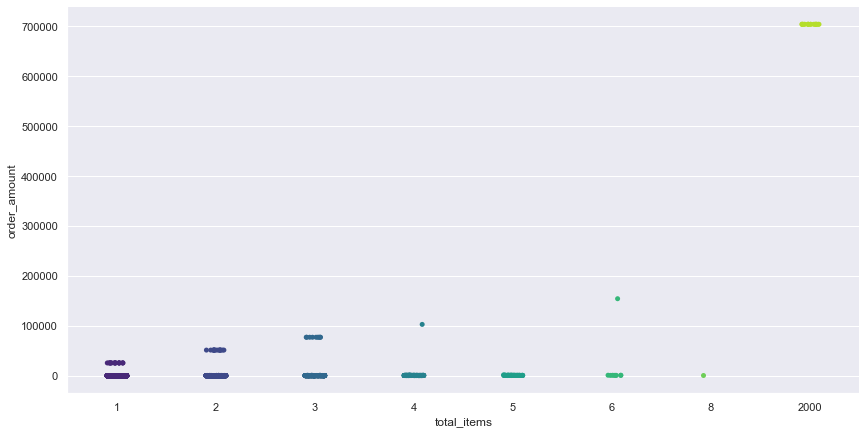

In [7]:
sns.catplot(data=df, x='total_items', y='order_amount', 
     palette='viridis',height=6, aspect=6/3)

And there it is the extreme outlier at the top, in lime green!
